In [16]:
##import packages

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
import seaborn as sns
import PIL
from PIL import Image
import scipy.ndimage as sp
from scipy.ndimage import gaussian_filter
import cv2
import matplotlib.colors as mc
import matplotlib
import markdown

In [7]:
def calculate_PCC(df, step_size, window_size, sigma):

    fives_raw = (df == 5).to_numpy()
    tens_raw = (df == 10).to_numpy()
    
    fives_windowed = np.lib.stride_tricks.sliding_window_view(fives_raw, window_shape=window_size).sum(axis=(2,3))
    tens_windowed = np.lib.stride_tricks.sliding_window_view(tens_raw, window_shape=window_size).sum(axis=(2,3))

    df_5 = fives_windowed[::step_size, ::step_size]
    df_10 = tens_windowed[::step_size, ::step_size]
    
    PCC = pd.DataFrame(index = range(df_5.shape[0]), columns = range(df_5.shape[1]))
    fives_bar = df_5.mean().mean()
    tens_bar = df_10.mean().mean()
    #print(fives_bar, tens_bar)
    numerator = 0
    denumerator = 0
    for x in range(df_5.shape[1]):
        for y in range(df_10.shape[0]):
            if df_5[y,x]==0 and df_10[y,x]==0:
                numerator = 0
            else:    
                numerator = (df_5[y,x] - fives_bar)*(df_10[y,x]-tens_bar)
                denumerator = ((df_5[y,x] - fives_bar)**2*(df_10[y,x]-tens_bar)**2)**(1/2)
                PCC.iloc[y,x] = numerator/denumerator
    PCC_plot = gaussian_filter(PCC.fillna(0).astype(float), sigma=sigma)
    return(PCC_plot)
    print(PCC_plot.mean.mean())

1314 432 5
1320 380 5
1342 378 5
1452 494 5
1456 632 5
1638 646 5
1588 686 5
1660 756 5
1324 762 5
1366 810 5
1412 864 5
1428 860 5
1454 824 5
1512 774 5
1178 772 5
1196 658 5
1188 648 5
1168 538 5
1132 570 5
1244 388 5
998 540 5
982 542 5
942 558 5
926 578 5
940 686 5
990 616 5
1010 712 5
686 1224 5
792 1194 5
824 1214 5
826 1226 5
818 1240 5
836 1320 5
942 1332 5
994 1408 5
966 1424 5
624 1322 5
658 1400 5
636 1520 5
664 1622 5
678 1630 5
760 1630 5
774 1622 5
852 1698 5
866 1658 5
868 1646 5
896 1624 5
888 1700 5
898 1724 5
884 1732 5
876 1750 5
862 1750 5
834 1720 5
736 1798 5
802 1808 5
840 1842 5
838 1832 5
838 1818 5
732 1866 5
764 1886 5
764 1902 5
706 1994 5
902 658 10
914 634 10
954 552 10
1034 496 10
1058 394 10
1082 408 10
1112 396 10
1226 388 10
1316 358 10
1346 408 10
1418 466 10
1508 450 10
1506 620 10
1496 642 10
1578 854 10
1580 828 10
1558 816 10
1680 748 10
1622 732 10
1370 834 10
1358 820 10
1296 802 10
1294 780 10
1322 762 10
1348 744 10
1248 698 10
1236 672 10
116

Text(0.5, 1.0, "Pearson's colocalization coefficient for UA12\n window size = (128, 128), step size = 4, sigma = 0")

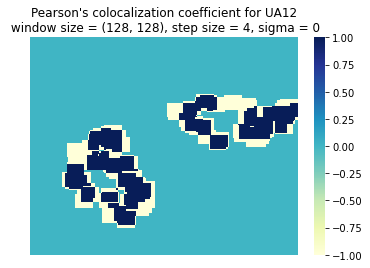

In [57]:
pic = 'UA12'
window_size = (128,128)
step_size = 4
sigma = 0
pix = 2048

raw_5 = pd.read_csv('/Users/tennisnyjmac/Desktop/'+ str(pic)+'/'+str(pic)+'_5.csv')
raw_10 = pd.read_csv('/Users/tennisnyjmac/Desktop/'+ str(pic)+'/'+str(pic)+'_10.csv')

raw_5['Type']= int(5)
raw_5.columns = ['#','X','Y','Type']

raw_10['Type']= int(10)
raw_10.columns = ['#','X','Y','Type']

df_5_10 = pd.concat([raw_5, raw_10]).reset_index(drop = True)


#df_5_10 = pd.read_csv('/Users/tennisnyjmac/Desktop/'+ str(pic)+'/'+str(pic)+'_5_10.csv').astype(int)
#df_5_10.columns = ['#', 'X', 'Y', 'Type']
#display(df_5_10)

df = pd.DataFrame(0, index=range(pix), columns=range(pix))

for i in range(len(df_5_10)):
    print(df_5_10.loc[i,'Y'],df_5_10.loc[i,'X'], df_5_10.loc[i,'Type'])
    df.iloc[df_5_10.loc[i,'Y'],df_5_10.loc[i,'X']] = df_5_10.loc[i,'Type']

    
PCC= calculate_PCC(df,step_size,window_size,sigma)

heatmap = sns.heatmap(PCC, cmap = "YlGnBu", xticklabels = False, yticklabels = False)
heatmap.set_title("Pearson's colocalization coefficient for "+str(pic)+ "\n window size = "+str(window_size)+", step size = " +str(step_size)+", sigma = "+str(sigma))




In [58]:
PCC.mean()

0.032122959357886595

In [59]:
path = '/Users/tennisnyjmac/Desktop/'+str(pic)+'/1547-SNX3-EGFP10vSNX27-2xHA15-rip-off-180nm'+str(pic)+'.jpg'
heatmap.figure.savefig('/Users/tennisnyjmac/Desktop/'+str(pic)+'/'+str(pic)+'_heatmap_PCC'+str(window_size)+'_'+str(step_size)+'_'+str(sigma)+'.png')
path_heatmap = '/Users/tennisnyjmac/Desktop/'+str(pic)+'/'+str(pic)+'_heatmap_PCC'+str(window_size)+'_'+str(step_size)+'_'+str(sigma)

In [60]:
overlay = Image.open(path_heatmap+'.png')
overlay = overlay.crop((54, 35, 322, 252))
overlay.show()
path_cropped = '/Users/tennisnyjmac/Desktop/'+str(pic)+'/'+str(pic)+'_cropped_heatmap_PCC'+str(window_size)+'_'+str(step_size)+'_'+str(sigma)+'.png'
overlay.save(path_cropped)

In [61]:
background = Image.open(path) 
overlay=Image.open(path_cropped)
overlay = overlay.resize((pix,pix))
background = background.convert("RGB") 
overlay = overlay.convert("RGB")
new_img = Image.blend(background, overlay, 0.3) 
new_img.save('/Users/tennisnyjmac/Desktop/'+str(pic)+'/'+str(pic)+'_overlayed_'+str(window_size)+'_'+str(step_size)+'_'+str(sigma)+'.png')
new_img.show()

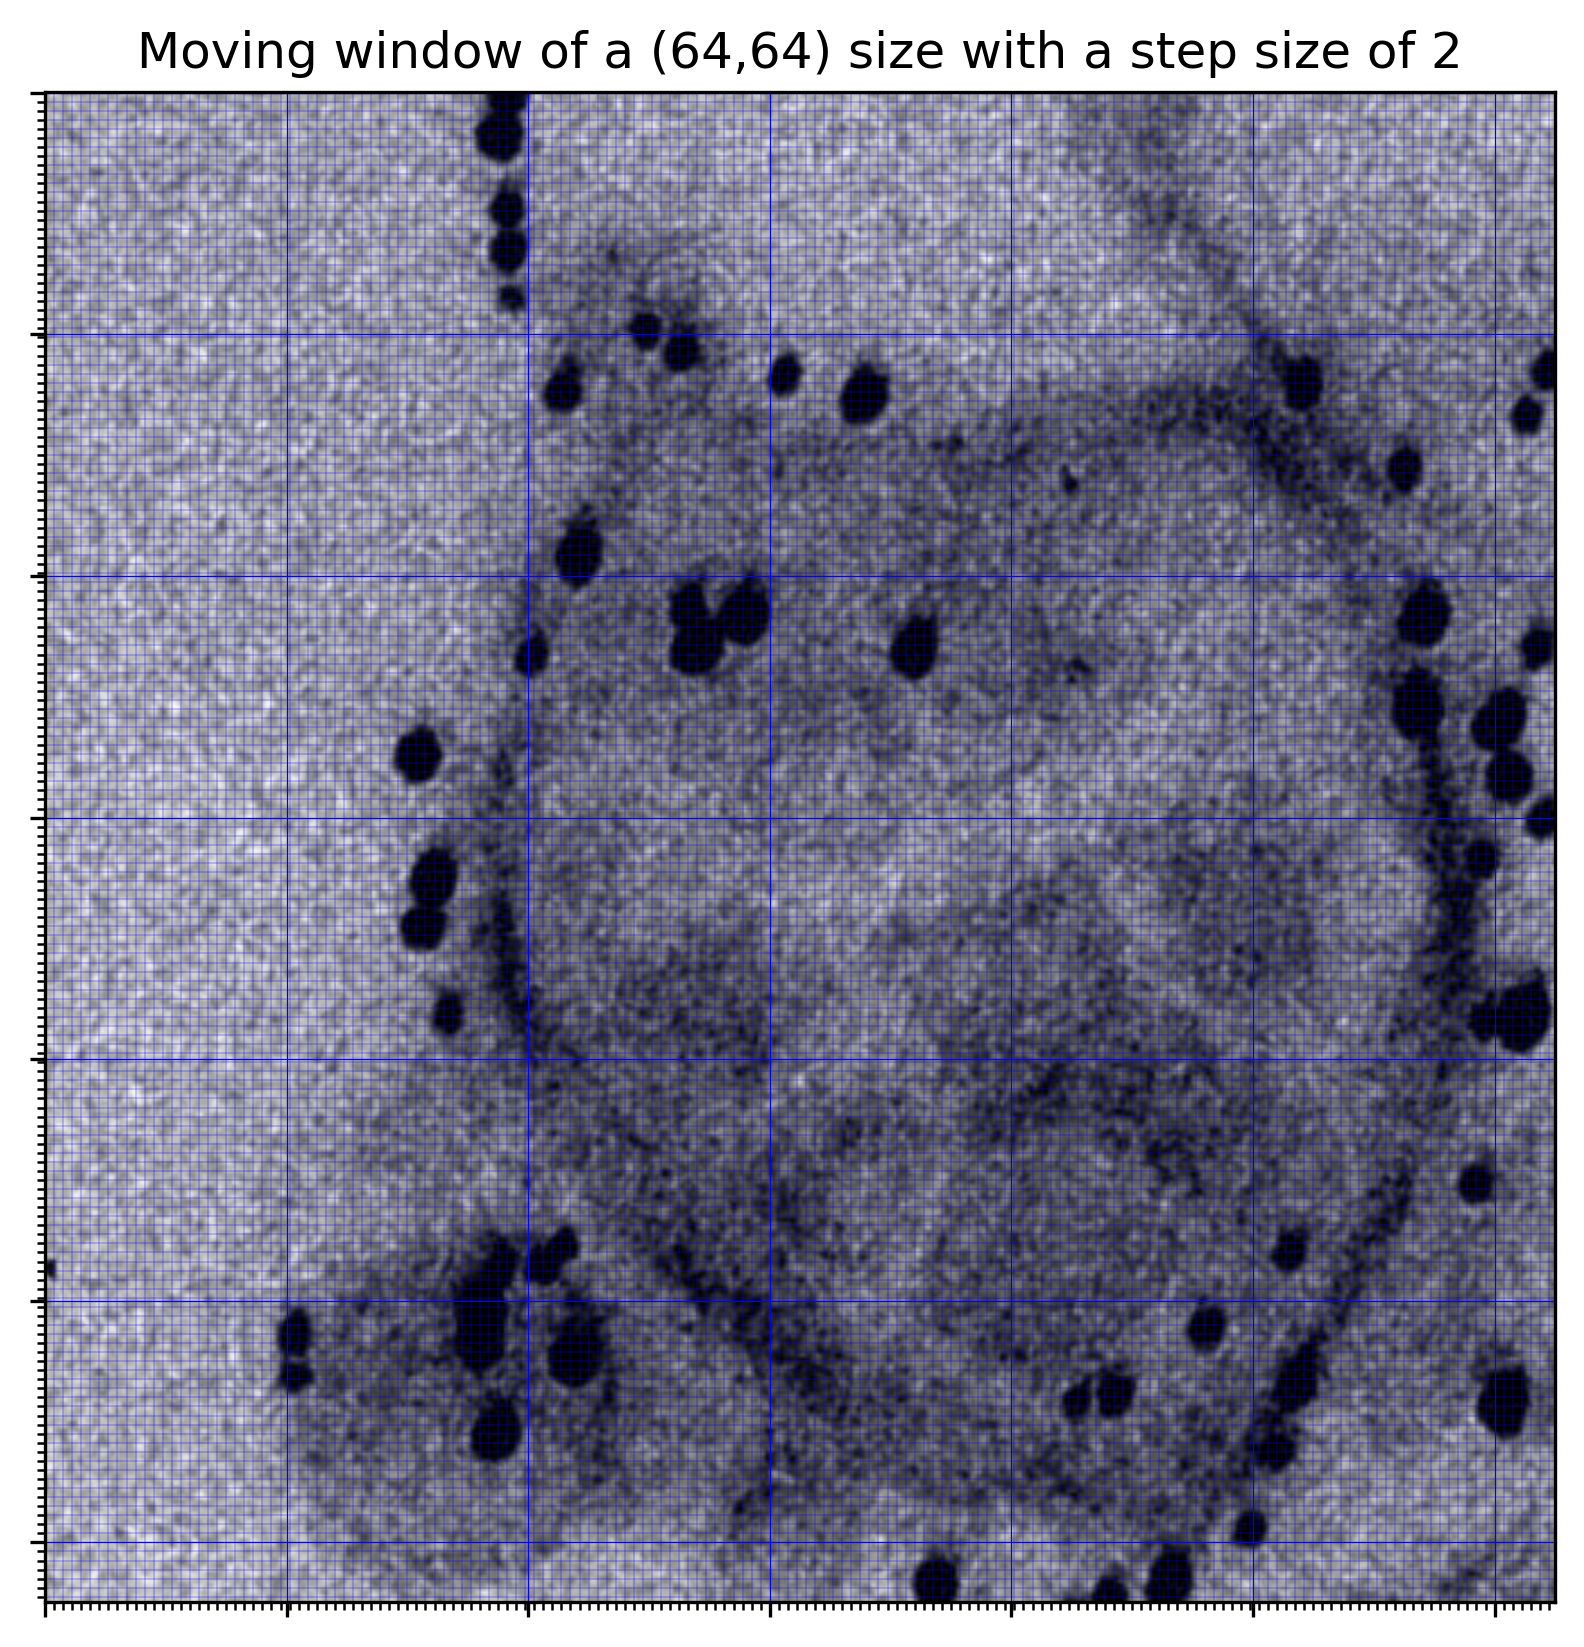

In [139]:
# prepare pictures for presentation
import matplotlib.ticker as plticker

# Open image file
image = Image.open(path)
cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  
image = image.crop((429,972,840,1373)).resize((2000,2000))

my_dpi=300.

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot()



# Set the gridding interval: here we use the major tick interval
myInterval_1=320.
myInterval_2=12.
loc_1 = plticker.MultipleLocator(base=myInterval_1)
loc_2 = plticker.MultipleLocator(base=myInterval_2)
ax.xaxis.set_major_locator(loc_1)
ax.yaxis.set_major_locator(loc_1)
ax.xaxis.set_minor_locator(loc_2)
ax.yaxis.set_minor_locator(loc_2)



# Add the grid
ax.grid(color='b', linestyle='-', linewidth=0.3, which='major', axis='both')
ax.grid(color='b', linestyle='-', linewidth=0.1, which='minor', axis='both')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Moving window of a (64,64) size with a step size of 2")



# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
#nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
#ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
#for j in range(ny):
#    y=myInterval/2+j*myInterval
#    for i in range(nx):
#        x=myInterval/2.+float(i)*myInterval
#        ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

# Save the figure
fig.savefig(path_heatmap+ '_for_presentation.jpg',dpi=my_dpi)

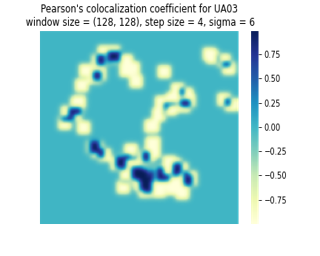

In [74]:
img = Image.open('/Users/tennisnyjmac/Desktop/Colocalization_project/UA03/UA03_overlayed_(128, 128)_4_6.png')
img.resize((256,256))

image = Image.open('Desktop/Colocalization_project/UA03/UA03_heatmap_PCC(128, 128)_4_6.png')
image.resize((320,256))